CodeBasics (Dhaval Patel) - https://github.com/codebasics/py/blob/master/ML/10_svm/10_svm.ipynb

# SVM - Support Vector Machines

## Linear Classification Algorithm

## Importing the Libraries and the Dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

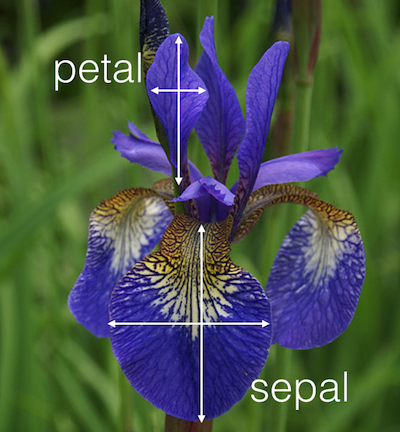

## Here we imported our Dataset into a variable 'iris', when we print this variable we see such an output

### This output does not have any feature names, nor does it have a target, like a normal dataframe would have, so we need to make it such

### For that we perform this step below

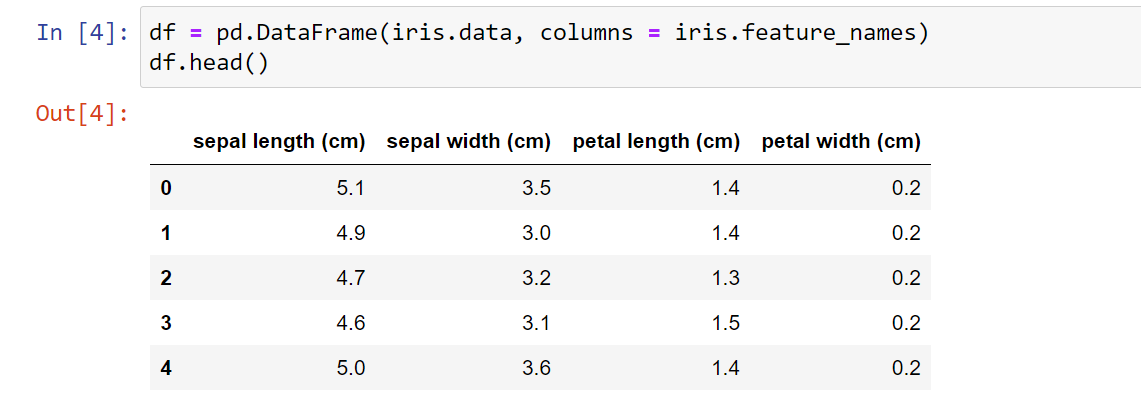

In [47]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## We have added the associated feature names with the corresponding feature values

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
df.shape

(150, 6)

## We add the Target column here in the dataset

In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Checking the Feature Values where the Target Variable is 1

In [6]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


## Checking the Feature Values where the Target Variable is 2

In [7]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


## The Target Values are 

<b>Feautres (1 - 50)    :  0 - setosa </b> <br>
<b>Feautres (50 - 100)  :  1 - versicolor </b> <br>
<b>Feautres (100 - 150) :  2 - virginica </b> <br>

So here we create another Column with the Flower names according to their number

In [8]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


## This step is very important for plotting the Scatter Plot 
(Best for Visualizations)

In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

### Importing Matplotlib.pyplot using alias as plt

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

### We can plot a very simple and basic SVM clssifier line across these datapoints are they're highly disinct

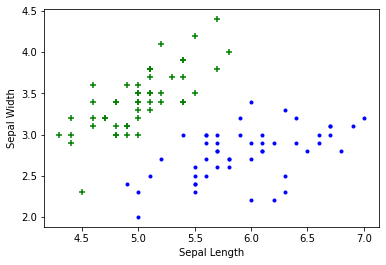

In [16]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

### We plot the Scatter Plot of the Petal lenght and width and this as well is already classified quite well, so it wont be quite difficult for the model

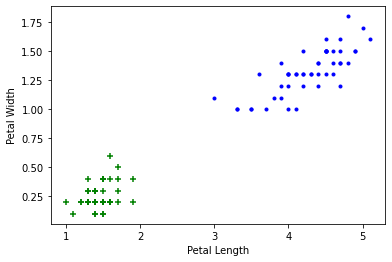

In [18]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

## Importing the train_test_split

In [19]:
from sklearn.model_selection import train_test_split

### For creating the Feature Variables we can't have the Target Values in them, hence we gotta get rid of that just for the Feature Variables, hence we perofrm drop function and get rid of the 2 target columns

In [20]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

### Split the dataset into train & test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
print("Training Set Size : ", len(X_train))
print("")
print("Testing Set Size : ", len(X_test))

Training Set Size :  120

Testing Set Size :  30


## Import the SVC (Support Vector Classifier)

It just has a different name, but it's the SVM itself

In [32]:
from sklearn.svm import SVC
model = SVC()

## Fitting the Training Set into our Model

In [33]:
model.fit(X_train, y_train)

SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## <b> The Score Function takes the X_test values and passes it to the Model for prediction

## Now the y_test has the correct predictions and now the X_test has the predicted values

### So the Score compares both of these and gives u a result of the % of accuracy 

In [34]:
model.score(X_test, y_test)

0.9333333333333333

### <b> Where '0' is Setosa 

In [35]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

## Tuning Parameters

### 1) Regularization (C)

In [36]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

### Using SVC as 10

In [41]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

## 2) Gamma 

In [43]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.8666666666666667

## 3) Kernel

In [44]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
model_linear_kernal.score(X_test, y_test)

0.9333333333333333

***